In [1]:
import pickle
from pylab import *
import matplotlib.image as mpimg
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
import h5py
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import gaussian_kde
from fluxCuts import getOVCBoundaries

In [2]:
with open('/data/chocula/villaa/PhotoN_SuperSim/possys/flux_data_0x0009_large_v4.pkl','rb') as readFile:
      data=pickle.load(readFile,encoding='latin1')

print(data.keys())

dict_keys(['costhet_2dvert', 'costhet_2dhori', 'pz', 'px', 'py', 'ptype', 'EventNum', 'y', 'color', 'costhet_3d', 'time', 'Edep', 'x', 'z', 'outflux_kde', 'inout', 'volname'])


In [3]:
#calculate some cuts

cIn = np.zeros(np.shape(data['x']),dtype=bool)
cIn[(data['inout']==1)] = True

cOut = np.zeros(np.shape(data['x']),dtype=bool)
cOut[(data['inout']==2)] = True

cInandOut = np.zeros(np.shape(data['x']),dtype=bool)
cInandOut[(data['inout']==3)] = True

cRand10p = np.zeros(np.shape(data['x']),dtype=bool)
randvec = np.random.rand(*np.shape(data['x']))
cRand10p[randvec>0.9] = True

r2d = np.sqrt(data['x']**2+data['y']**2)
cROVC = np.zeros(np.shape(data['x']),dtype=bool)
cROVC[r2d<0.25] = True

cZOVC = np.zeros(np.shape(data['x']),dtype=bool)
cZOVC[(data['z']<0.71)&(data['z']>0.1)] = True

cToCenter3d = np.zeros(np.shape(data['x']),dtype=bool)
cToCenter3d[data['costhet_3d']>0] = True

cDown = np.zeros(np.shape(data['x']),dtype=bool)
cDown[data['costhet_2dhori']>0] = True

cInward = np.zeros(np.shape(data['x']),dtype=bool)
cInward[data['costhet_2dvert']>0] = True

In [4]:
#trying to customize here, see:
#https://matplotlib.org/users/customizing.html
#matplotlib.rc('figure', figsize=(3.4, 3.4*(4/6)))
mpl.rcParams['lines.linewidth'] = 2

#ticks
mpl.rcParams['xtick.top'] = False
mpl.rcParams['xtick.bottom'] = True
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['xtick.major.size'] = 8
mpl.rcParams['xtick.minor.size'] = 4
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['xtick.minor.width'] = 1
mpl.rcParams['xtick.labelsize'] = 22

mpl.rcParams['ytick.left'] = True
mpl.rcParams['ytick.right'] = False
mpl.rcParams['ytick.minor.visible'] = True
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['ytick.major.size'] = 8
mpl.rcParams['ytick.minor.size'] = 4
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.width'] = 1
mpl.rcParams['ytick.labelsize'] = 22


#error bars
#mpl.rcParams['errorbar.capsize'] = 3

#axis stuff
mpl.rcParams['axes.labelsize'] = 22

#fonts
# Set the font dictionaries (for plot title and axis titles)
title_font = {'fontname':'Arial', 'size':'16', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'32'}
legend_font = {'fontname':'Arial', 'size':'22'}

#fonts global settings
mpl.rc('font',family=legend_font['fontname'])

In [5]:
#set up a plot
fig = plt.figure(figsize=(12,10),frameon=False)
ax1 = fig.add_subplot(111, projection='3d')
#fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),projection='3d')
#ax1 = axes[0]

#lay out the colors
rgb_r = (255/255.0,0/255.0,0/255.0)
rgb_b = (0/255.0,0/255.0,255/255.0)
rgb_o = (255/255.0,127/255.0,0/255.0)
rgb_b = (31/255.0,120/255.0,180/255.0)
rgb_lr = (251/255.0,154/255.0,153/255.0)
rgb_g = (203/255.0,195/255.0,195/255.0)



x = data['x'][(cOut|cInandOut)&cRand10p]
y = data['y'][(cOut|cInandOut)&cRand10p]
z = data['z'][(cOut|cInandOut)&cRand10p]
color = data['color'][(cOut|cInandOut)&cRand10p]


#ax1.scatter(data['x'][(incut==1)&(randcut==1)], data['y'][(incut==1)&(randcut==1)], data['z'][(incut==1)&(randcut==1)], s=1,c='r', marker='o',label='inward')
s = ax1.scatter(x, y, z, s=1,c=color, marker='o',label='outward',cmap='inferno')



#ax1.set_yscale('linear')
ax1.set_xlim(-0.5, 0.5)
ax1.set_ylim(-0.5,0.5)
ax1.set_zlim(0.0,1.1) # try to make the aspect ratio 1:1:1
ax1.set_xlabel('sim X pos. [m]',labelpad=20,**axis_font) #labelpad is distance of axis to label
ax1.set_ylabel('sim Y pos. [m]',labelpad=20,**axis_font)
ax1.set_zlabel('sim Z pos. [m]',labelpad=20,**axis_font)
#ax1.grid(True)
#ax1.yaxis.grid(True,which='minor',linestyle='--')

#lgnd= ax1.legend(loc=2,prop={'size':22})
#lgnd.legendHandles[0]._sizes = [30]
#lgnd.legendHandles[1]._sizes = [30]

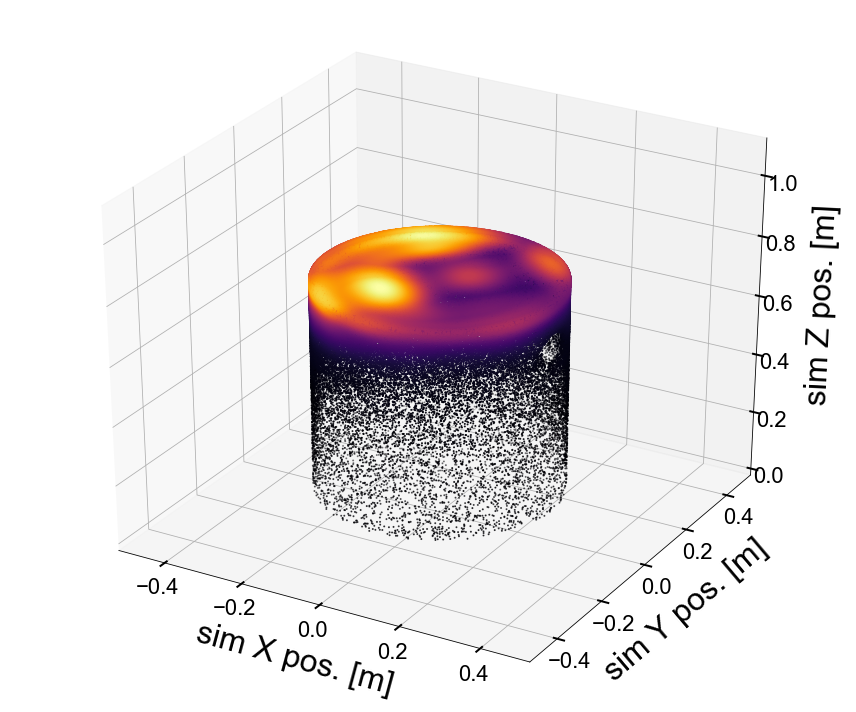

In [6]:
plt.tight_layout()
plt.savefig('figures/GammaFlux_OVC_heat.png')
#plt.colorbar(s[3],fraction=0.046,pad=0.04)
plt.show()

In [7]:
#set up a 2-d plot

fig,axes = plt.subplots(1,1,figsize=(17.0,17.0),frameon=False)
ax1 = axes

#need to play with axis
mpl.rcParams['ytick.minor.visible'] = False

bdr,bcuts = getOVCBoundaries(data['x'],data['y'],data['z'])

#x2 = data['x'][(cOut|cInandOut)&cROVC&cDown&bcuts['cOVCLidC']]
#y2 = data['y'][(cOut|cInandOut)&cROVC&cDown&bcuts['cOVCLidC']]
x2 = data['x'][(cOut|cInandOut)&cROVC&cDown]
y2 = data['y'][(cOut|cInandOut)&cROVC&cDown]

#print(bcuts['cOVCLidPr'])

#h = ax1.hist2d(x2,y2, bins=100, norm=LogNorm(), cmap='inferno')
h = ax1.hist2d(x2,y2, bins=200, cmap='inferno',range=np.array([(-0.25, 0.25), (-0.25, 0.25)]))



ax1.plot(bdr['Pr']['x'], bdr['Pr']['y'], 'r--', linewidth=1.5, label='Primary Loc.')
ax1.plot(bdr['A']['x'], bdr['A']['y'],linestyle='--', color=rgb_o, linewidth=1.5, label='Loc. A')
ax1.plot(bdr['B']['x'], bdr['B']['y'], 'g--', linewidth=1.5, label='Loc. B')
ax1.plot(bdr['C']['x'], bdr['C']['y'],linestyle='--', color=rgb_lr, linewidth=1.5, label='Loc. C')
ax1.plot(bdr['D']['x'], bdr['D']['y'], linestyle='--', color=rgb_b, linewidth=1.5, label='Loc. D')

inout = np.zeros(np.shape(data['x']))
inout[(cOut|cInandOut)] = 1
print('out of {0:d} events we have {1:d} going outward'.format(np.int(np.size(inout)),np.int(np.sum(inout))))

#ax1.set_yscale('linear')
ax1.set_xlim(-0.25, 0.25)
ax1.set_ylim(-0.25,0.25)
ax1.set_xlabel('sim X pos. [m]',**axis_font) 
ax1.set_ylabel('sim Y pos. [m]',**axis_font)
#ax1.set_zlabel('sim Z pos. [m]',labelpad=20,**axis_font)
ax1.grid(True)
#ax1.yaxis.grid(True,which='minor',linestyle='--')
#equal aspect ratio:
#https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_aspect.html
ax1.set_aspect('equal')

lgnd= ax1.legend(loc=2,prop={'size':22})

out of 2063315 events we have 2063315 going outward


In [8]:
for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

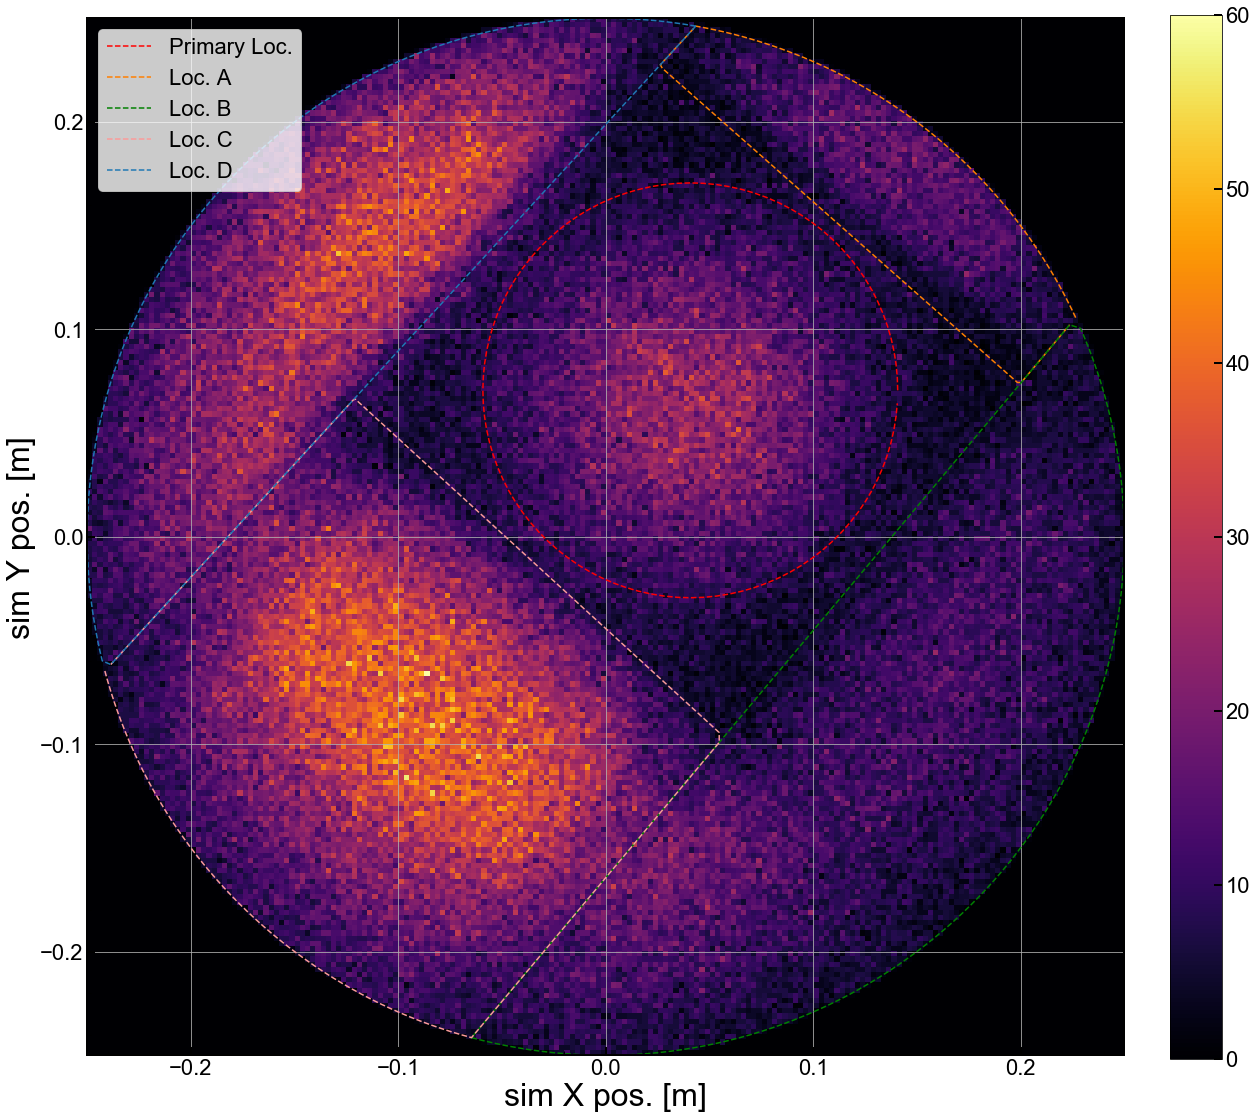

In [9]:
plt.tight_layout()
plt.savefig('figures/GammaFlux_OVC_2d.png')
plt.colorbar(h[3],fraction=0.046,pad=0.04)
plt.show()

In [10]:
#let's also have a look at the vertical surface

fig,axes = plt.subplots(1,1,figsize=(17.0,17.0),frameon=False)
ax1 = axes

#need to play with axis
mpl.rcParams['ytick.minor.visible'] = False

bdr,bcuts = getOVCBoundaries(data['x'],data['y'],data['z'])

cYPos = np.zeros(np.shape(data['x']),dtype=bool)
cYNeg = np.zeros(np.shape(data['x']),dtype=bool)
cYPos[data['y']>=0] = True
cYNeg[data['y']<0] = True
phi = np.zeros(np.shape(data['x']))
phi[cYPos] = np.arccos(data['x'][cYPos]/np.sqrt(data['x'][cYPos]**2+data['y'][cYPos]**2))
phi[cYNeg] = 2*np.pi - np.arccos(data['x'][cYNeg]/np.sqrt(data['x'][cYNeg]**2+data['y'][cYNeg]**2))


#x2 = data['x'][(cOut|cInandOut)&cROVC&cDown&bcuts['cOVCLidC']]
#y2 = data['y'][(cOut|cInandOut)&cROVC&cDown&bcuts['cOVCLidC']]
#x2 = data['x'][(cOut|cInandOut)&cZOVC&cInward&bcuts['cOVCVertB']]
#y2 = data['y'][(cOut|cInandOut)&cZOVC&cInward&bcuts['cOVCVertB']]
#z2 = data['z'][(cOut|cInandOut)&cZOVC&cInward&bcuts['cOVCVertB']]
#phi2 = phi[(cOut|cInandOut)&cZOVC&cInward&bcuts['cOVCVertB']]
x2 = data['x'][(cOut|cInandOut)&cZOVC&cInward]
y2 = data['y'][(cOut|cInandOut)&cZOVC&cInward]
z2 = data['z'][(cOut|cInandOut)&cZOVC&cInward]
phi2 = phi[(cOut|cInandOut)&cZOVC&cInward]



#print(bcuts['cOVCLidPr'])

#h = ax1.hist2d(x2,y2, bins=100, norm=LogNorm(), cmap='inferno')
h1 = ax1.hist2d(phi2,z2, bins=200, cmap='inferno',range=np.array([(0, 2*np.pi), (0.0, 0.8)]))

ax1.plot(bdr['VA']['x'], bdr['VA']['y'], 'r--', linewidth=1.5, label='Loc. Vert. A')
ax1.plot(bdr['VB']['x'], bdr['VB']['y'], 'b--', linewidth=1.5, label='Loc. Vert. B')


#ax1.set_yscale('linear')
ax1.set_xlim(0, 2*np.pi)
ax1.set_ylim(0.0,0.8)
ax1.set_xlabel('sim angle $\phi$ [rad]',**axis_font) 
ax1.set_ylabel('sim Z pos. [m]',**axis_font)
#ax1.set_zlabel('sim Z pos. [m]',labelpad=20,**axis_font)
ax1.grid(True)
#ax1.yaxis.grid(True,which='minor',linestyle='--')
#equal aspect ratio:
#https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_aspect.html
#ax1.set_aspect('equal')

lgnd= ax1.legend(loc=2,prop={'size':22})

In [11]:
for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

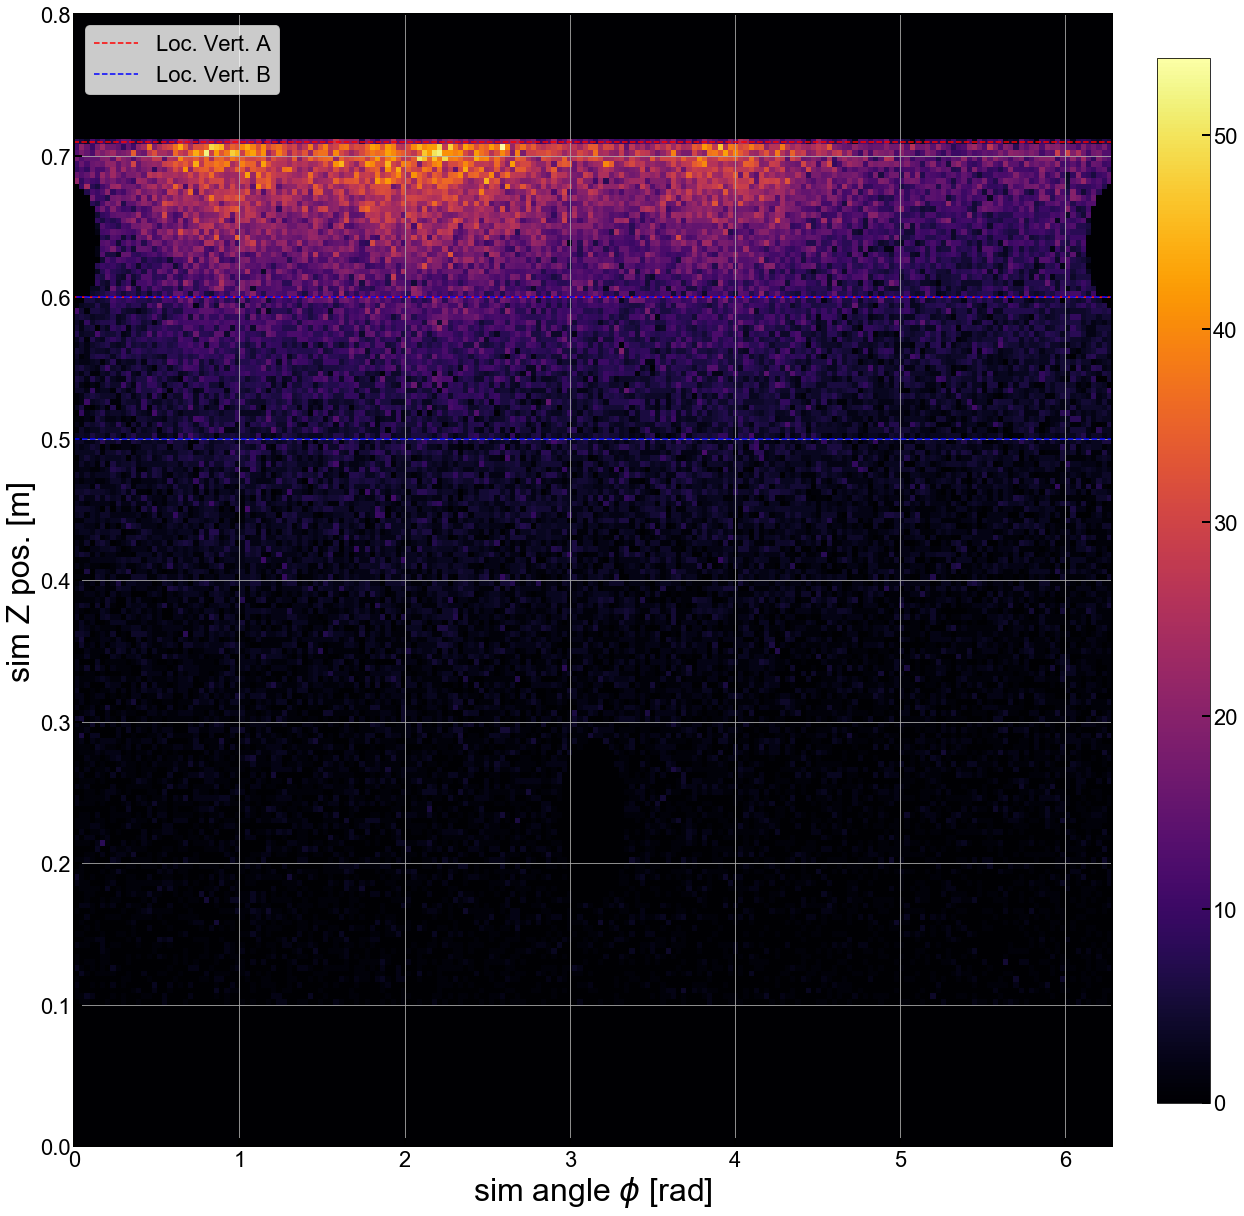

In [12]:
plt.tight_layout()
plt.savefig('figures/GammaFlux_OVC_vert2d.png')
plt.colorbar(h1[3],fraction=0.046,pad=0.04)
plt.show()

In [13]:
#let's calculate the total cut-down of events
prim = 370e6 #this whole data set was about 370M primaries
ctime = 100*5 #hrs, it takes about 5 hrs to run 3.7M primaries
ltime = 100 #this is about 100s of livetime
livetime = 30*3 #days of livetime in experiment

nx = data['x'][(cOut|cInandOut)&((cZOVC&cInward)|(cROVC&cDown))]

print('of 370M primaries need to rethrow {0:d}'.format(len(nx)))
print('this means that for 100s of livetime you need {0:4.3f} hrs compute time'.format(ctime*(len(nx)/np.float(prim))))
print('assuming a factor of 100 parallelization this is {0:4.3f} hrs of wall time for 100s of livetime'.format((1/100.0)*ctime*(len(nx)/np.float(prim))))
print('or {0:4.3f} hrs of wall time for 1 day of livetime'.format((24*60*60/100.0)*(1/100.0)*ctime*(len(nx)/np.float(prim))))
comphrsperday = (24*60*60/100.0)*(1/100.0)*ctime*(len(nx)/np.float(prim))
print('or {0:4.3f} days for the whole 3-month run period assuming a mCi source'.format(comphrsperday*livetime*(1/24.0)))

of 370M primaries need to rethrow 629827
this means that for 100s of livetime you need 0.851 hrs compute time
assuming a factor of 100 parallelization this is 0.009 hrs of wall time for 100s of livetime
or 7.354 hrs of wall time for 1 day of livetime
or 27.576 days for the whole 3-month run period assuming a mCi source
